# The Most Profitablle Oil Region

This project is dedicated to oil industry. We need to find a location for drilling new boreholes. In our possesion oil samples from the three regions. Quality of oil and value of reservoirs were measured in 10 000 borehols in each of them. We need to build a model to find out wich region will bring the most profit, make profitability and risk assesment via bootstrap technique.


## Data loading and preprocessing

In [1]:
# load data and libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [2]:
#explore the data
all_data = [data_0, data_1, data_2]
for data in all_data:
    print(data.head())
    print('_________________')
    print(data.info())
    print('_________________')
    print(data.describe())


      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
_________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
_________________
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328    

In [3]:
#check data on multicollinearity
for data in all_data:
    print(data.corr())
    print('_________________')


               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
_________________
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
_________________
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000
_________________


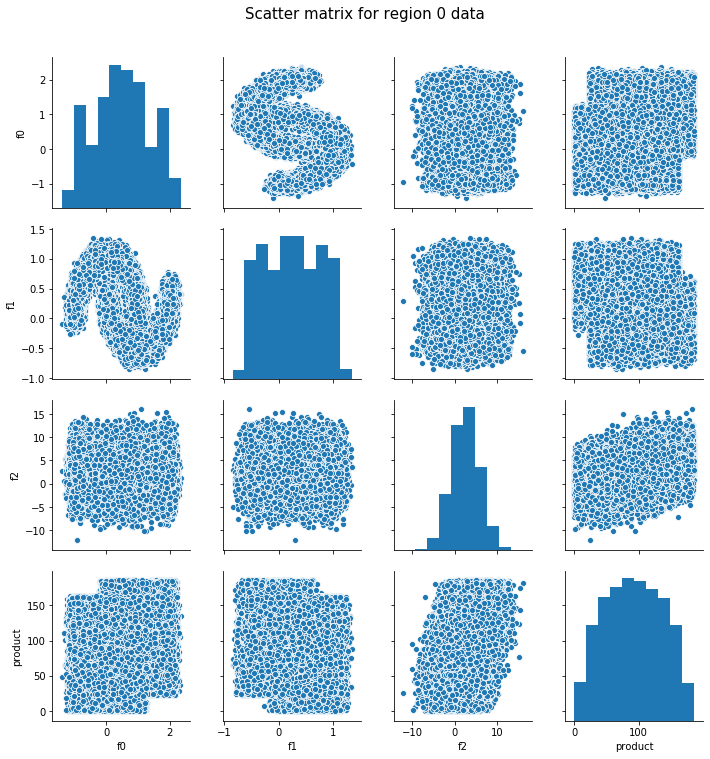

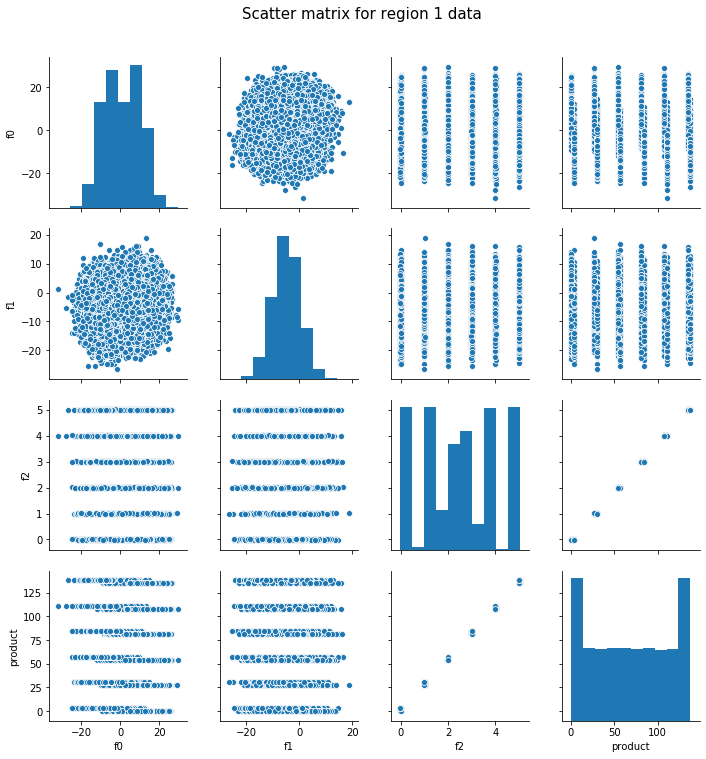

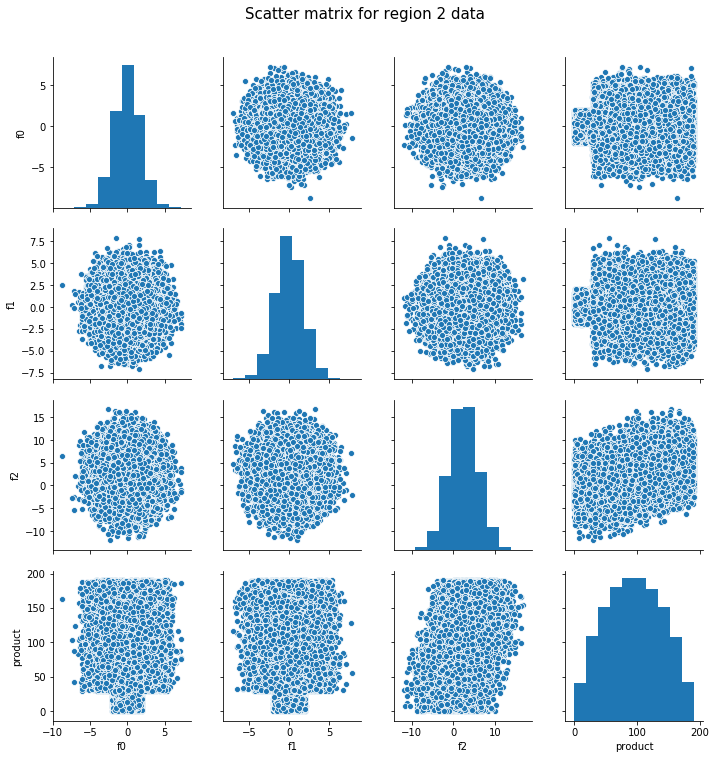

In [4]:
# plot scatter matriсes
region = 0
for data in all_data:
    plot = sns.pairplot(data)
    plot, plot.fig.suptitle('Scatter matrix for region {} data'. format(region), fontsize=15, y=1.05)
    region += 1

### Conclusion

After data exploration we can say following:
- in region 0 features f0 and f1 has correlation. Multicollinearity can lead to misleading cocnlusion on how well each of features can be used to predict a target 
- in region 1 features f2 has strong correlation with target. It might be coused by data leakage. It means model might make incorrect predictions. So we should ask client about data appearance. 


## Machine Learning

In [5]:
#brake off features and targets from dataset
region = 0
predictions_full = pd.DataFrame()
av_predictions = []
rmse = []
for data in all_data:
    
    features = data.drop('product', axis=1).select_dtypes(exclude=['object'])
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, 
        test_size=0.25, 
        random_state=12345)
    
    #check samples sizes
    samples = [features_train, features_valid, target_train, target_valid]
    for sample in samples:
        print(sample.shape)
        print()
    
    #learn LinearRegression model
    model = LinearRegression(n_jobs=2)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    model_rmse = (mean_squared_error(target_valid, predicted_valid)) ** 0.5
    
    #put predictions together
    av_predictions.append(np.mean(predicted_valid))
    rmse.append(model_rmse)
    
    #put predictions, targets and rmse all together
    predictions_full['region_{}_predictions'. format(region)] = predicted_valid
    predictions_full['region_{}_product'. format(region)] = target_valid.reset_index(drop=True)
    predictions_full['region_{}_rmse'. format(region)] = model_rmse
    
    print('root_mean_squared_error for region {} data ='. format(region), model_rmse)
    print('average predicted reservoir value for region {} ='. format(region), np.mean(predicted_valid))
    print()
    region += 1

(75000, 3)

(25000, 3)

(75000,)

(25000,)

root_mean_squared_error for region 0 data = 37.5794217150813
average predicted reservoir value for region 0 = 92.59256778438038

(75000, 3)

(25000, 3)

(75000,)

(25000,)

root_mean_squared_error for region 1 data = 0.893099286775616
average predicted reservoir value for region 1 = 68.728546895446

(75000, 3)

(25000, 3)

(75000,)

(25000,)

root_mean_squared_error for region 2 data = 40.02970873393434
average predicted reservoir value for region 2 = 94.96504596800489



In [6]:
#get prediction and remse in one dataframe 
stat = pd.DataFrame({'av_predictions' : av_predictions, 'rmse' : rmse}, index =['region_0', 'region_1', 'region_2'])
stat

,av_predictions,rmse
region_0,92.592568,37.579422
region_1,68.728547,0.893099
region_2,94.965046,40.029709


Text(0, 0.5, 'oil_values')

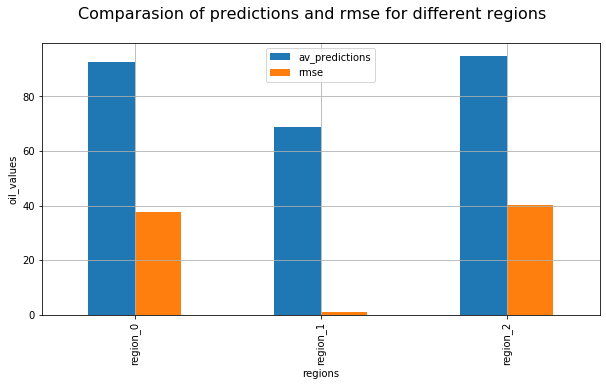

In [7]:
#plot predictions comparasion
stat.plot(y=['av_predictions', 'rmse'], kind='bar', figsize=(10,5), grid=True)
plt.suptitle('Comparasion of predictions and rmse for different regions', fontsize=16)
plt.xlabel('regions')
plt.ylabel('oil_values')

### Conclusion

rmse of region 1 is too good (suspiciously good). It supports our theory of data leakage. Metrics of region 0 and 1 look "healthy" 

In [8]:
#do the same without f2 feature
all_data_dropped = [data_0, data_1.drop('f2', axis=1), data_2]

region = 0
predictions = pd.DataFrame()
av_predictions = []
rmse = []
for data in all_data_dropped:
    
    features = data.drop('product', axis=1).select_dtypes(exclude=['object'])
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, 
        test_size=0.25, 
        random_state=12345)
    
    #check samples sizes
    samples = [features_train, features_valid, target_train, target_valid]
    for sample in samples:
        print(sample.shape)
        print()
    
    #learn LinearRegression model
    model = LinearRegression(n_jobs=2)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    model_rmse = (mean_squared_error(target_valid, predicted_valid)) ** 0.5
    
    #put predictions together
    av_predictions.append(np.mean(predicted_valid))
    rmse.append(model_rmse)
    
    #put predictions, targets and rmse all together
    predictions['region_{}_predictions'. format(region)] = predicted_valid
    predictions['region_{}_product'. format(region)] = target_valid.reset_index(drop=True)
    predictions['region_{}_rmse'. format(region)] = model_rmse
    
    print('root_mean_squared_error for region {} data ='. format(region), model_rmse)
    print('average predicted reservoir value for region {} ='. format(region), np.mean(predicted_valid))
    print()
    region += 1

(75000, 3)

(25000, 3)

(75000,)

(25000,)

root_mean_squared_error for region 0 data = 37.5794217150813
average predicted reservoir value for region 0 = 92.59256778438038

(75000, 2)

(25000, 2)

(75000,)

(25000,)

root_mean_squared_error for region 1 data = 46.006958160915644
average predicted reservoir value for region 1 = 68.85899112906348

(75000, 3)

(25000, 3)

(75000,)

(25000,)

root_mean_squared_error for region 2 data = 40.02970873393434
average predicted reservoir value for region 2 = 94.96504596800489



In [9]:
#get prediction and remse in one dataframe
stat = pd.DataFrame({'av_predictions' : av_predictions, 'rmse' : rmse}, index =['region_0', 'region_1', 'region_2'])
stat

,av_predictions,rmse
region_0,92.592568,37.579422
region_1,68.858991,46.006958
region_2,94.965046,40.029709


Text(0, 0.5, 'oil_reserves')

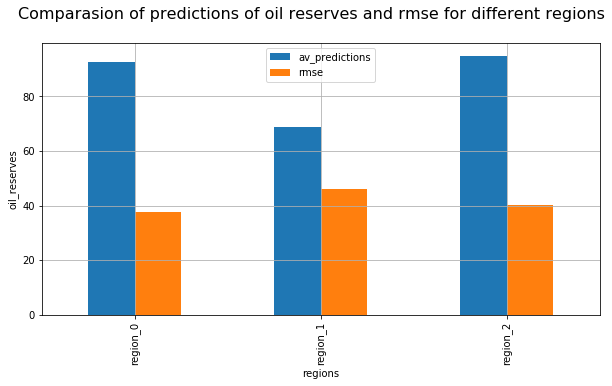

In [10]:
#plot predictions comparasion
stat.plot(y=['av_predictions', 'rmse'], kind='bar', figsize=(10,5), grid=True)
plt.suptitle('Comparasion of predictions of oil reserves and rmse for different regions', fontsize=16)
plt.xlabel('regions')
plt.ylabel('oil_reserves')

### Conclusion

Without suspicious feature rmse of region 1 looks more like in other regions


## Preparing Profit Calculations




In [11]:
#create constants
price = 450000
budget_for_200 = 10e+09
budget_for_one = budget_for_200 / 200
reserve_treshold = budget_for_one / price
print('Reserve value to drill new borehole without any loss = ', reserve_treshold)

Reserve value to drill new borehole without any loss =  111.11111111111111


In [12]:
#calculate average reserve value for each region
av_reserve = []
for data in all_data_dropped:
    av_reserve.append(np.mean(data['product']))

av_reserve = pd.DataFrame({'av_reserve' : av_reserve}, index =['region_0', 'region_1', 'region_2'])
av_reserve

,av_reserve
region_0,92.500
region_1,68.825
region_2,95.000


Text(0, 0.5, 'oil_reserves')

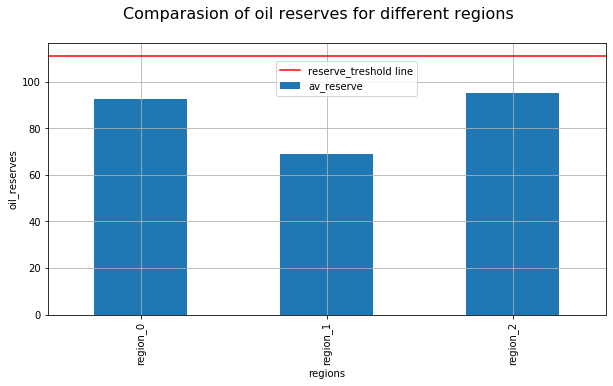

In [13]:
#plot average reserves
av_reserve.plot(y=['av_reserve'], kind='bar', figsize=(10,5), grid=True)
plt.suptitle('Comparasion of oil reserves for different regions', fontsize=16)
plt.axhline(reserve_treshold, label='reserve_treshold line', color='red')
plt.legend(loc="higher right", bbox_to_anchor=(0.4, 0.45, 0.5, 0.5))
plt.xlabel('regions')
plt.ylabel('oil_reserves')

### Conclusion

After preliminary calculations we can say that only boreholes with reserve values significantly more than average much our requirements.


In [14]:
predictions.head()

,region_0_predictions,region_0_product,region_0_rmse,region_1_predictions,region_1_product,region_1_rmse,region_2_predictions,region_2_product,region_2_rmse
0,95.894952,10.038645,37.579422,68.952726,80.859783,46.006958,93.599633,61.212375,40.029709
1,77.572583,114.551489,37.579422,68.062351,53.906522,46.006958,75.105159,41.850118,40.029709
2,77.892640,132.603635,37.579422,70.074520,30.132364,46.006958,90.066809,57.776581,40.029709
3,90.175134,169.072125,37.579422,67.021316,53.906522,46.006958,105.162375,100.053761,40.029709
4,70.510088,122.325180,37.579422,68.058043,0.000000,46.006958,115.303310,109.897122,40.029709


In [15]:
#function for earnings calculation
def revenue(target, probabilities, number_of_wellbores):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:number_of_wellbores]
    return (selected * price - budget_for_one).sum()

all_earnings = []
for region in range(0, 3):
    
    earnings = revenue(predictions['region_{}_product'. format(region)], predictions['region_{}_predictions'. format(region)], 200)
    print('Profit of selected wellbores in region {} = ' .format(region), earnings)
    all_earnings.append(earnings)
    
all_earnings = pd.DataFrame({'all_earnings' : all_earnings}, index=['region_0', 'region_1', 'region_2'])


Profit of selected wellbores in region 0 =  3320826043.139851
Profit of selected wellbores in region 1 =  -4207329538.7677903
Profit of selected wellbores in region 2 =  2710349963.5998316


Text(0, 0.5, 'earnings')

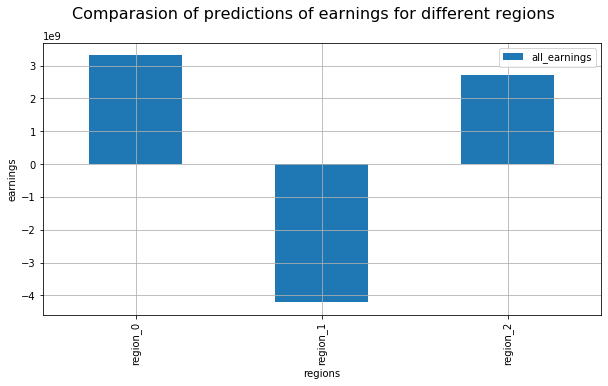

In [16]:
#plot predictions comaparion
all_earnings.plot(y=['all_earnings'], kind='bar', figsize=(10,5), grid=True)
plt.suptitle('Comparasion of predictions of earnings for different regions', fontsize=16)
plt.xlabel('regions')
plt.ylabel('earnings')

### Conclusion

After removing suspicious feature rmse of region 1 has became more like in others regions. But model performance is distinctly worse


## Profit And Lost Probability Calculation

In [17]:
#apply bootstrap to 1000 samples to calculate profit distribution and loss probability
state = np.random.RandomState(12345)

for region in range(0, 3):

    values = []
    loss = []
    for i in range(1000):
        target_subsample = predictions['region_{}_product'. format(region)].sample(500, replace=True, random_state=state)
        probs_subsample = predictions['region_{}_predictions'. format(region)][target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, 200))
        if revenue(target_subsample, probs_subsample, 200) < 0:
            loss.append(revenue(target_subsample, probs_subsample, 200))

    values = pd.Series(values)
    loss = pd.Series(loss)
    lower = values.quantile(0.05)
    upper = values.quantile(0.95)
    loss_probability = (values < 0).mean()* 100, "%"
    print('average profit for region {} = ' .format(region), values.mean())
    print('confidence interval for region {} = ' .format(region), [lower, upper])
    print('loss probability for region {} = ' .format(region), loss_probability)
    print()

average profit for region 0 =  425938526.91059244
confidence interval for region 0 =  [-31803114.34611535, 881341454.3602806]
loss probability for region 0 =  (6.0, '%')

average profit for region 1 =  -3685591615.9233985
confidence interval for region 1 =  [-4190224584.651621, -3192645000.646676]
loss probability for region 1 =  (100.0, '%')

average profit for region 2 =  420194005.3440501
confidence interval for region 2 =  [-26088856.289921176, 909597825.46965]
loss probability for region 2 =  (6.2, '%')



### Conclusion

After calculation of average profit we can say that loss probabilities of regions 0 and 2 are greater than 2.5% Average profit in region 1 is negative  


In [18]:
#colculate profit and losses for region 1 with suspicious feature f2
values = []
loss = []
for i in range(1000):
    target_subsample = predictions_full['region_1_product'].sample(500, replace=True, random_state=state)
    probs_subsample = predictions_full['region_1_predictions'][target_subsample.index]
    values.append(revenue(target_subsample, probs_subsample, 200))
    if revenue(target_subsample, probs_subsample, 200) < 0:
        loss.append(revenue(target_subsample, probs_subsample, 200))

values = pd.Series(values)
loss = pd.Series(loss)
lower = values.quantile(0.05)
upper = values.quantile(0.95)
loss_probability = (values < 0).mean()* 100, "%"
print('average profit for region 1 = ' .format(region), values.mean())
print('confidence interval for region 1 = ', [lower, upper])
print('loss probability for region 1 = ', loss_probability)

average profit for region 1 =  511289691.3937346
confidence interval for region 1 =  [182143786.5236057, 862205662.265927]
loss probability for region 1 =  (1.2, '%')


### Conclusion

After recalculation an average profit in region 1 has became much higher. Loss probability is lesser than 2.5% It means region 1 is good enough for oil extraction.


## General Conclusion

In this project we've built models to predict the most profitable region for oil extraction. Via bootstrap technique we analyzed earnings and loss probabilities for each region. So we can say that region 1 looks like the most promising, but its suspicious data raises questions. I think we shoult ask them to our client. 
